**Don Quijote or Don Quixote (translated to English) is the most famous book of the spanish culture...**

In [1]:
# __________
# / ___  ___ \
#/ / @ \/ @ \ \
#\ \___/\___/ /\
# \____\/____/||
# /     /\\\\\//
# |     |\\\\\\
#  \      \\\\\\
#   \______/\\\\
#    _||_||_
#     -- --
#Y si...
#BAA


#!/usr/bin/python
# -*- coding: utf-8 -*-
#Loading Libraries:

import pandas as pd
import re
from nltk.collocations import *
import nltk
from nltk import FreqDist
from wordcloud import WordCloud ,  ImageColorGenerator
import matplotlib.pyplot as plt
import random

### As they always say, 80% of a data-related project is to clean the data

In [2]:
#Loading txt files:
dq1 = open('don_quixote.txt')
dq2 = open('don_quixote2.txt')

#Transforming txt files into lists:
dql1 = dq1.readlines()
dql2 = dq2.readlines()
#Printing the length of both files:
print ("Total lines file1 : " + str(len(dql1)))
print ("Total lines file1 : " + str(len(dql2)))

Total lines file1 : 16870
Total lines file1 : 18069


In [3]:
#Mergint the two lists:
dql = dql1 + dql2
print ("Total lines: " + str(len(dql)))

Total lines: 34939


In [4]:
#Preview of the file:
dql[0:10]

['\n',
 '                                      1605\n',
 '                                  DON QUIXOTE\n',
 '                             by Miguel de Cervantes\n',
 '                           Translated by John Ormsby\n',
 '\n',
 "THE AUTHOR'S PREFACE\n",
 '\n',
 '  IDLE READER: thou mayest believe me without any oath that I would\n',
 'this book, as it is the child of my brain, were the fairest, gayest,\n']

We can see in every line we have the separator \n, and the first 5 files are just the title.


I will create a pandas object with the txt. It is useful to have a pandas object because it is more
easy to manipulate the data and is possible to add some tags (metadata) to the the text, like the line number, chapter number and others




In [5]:
#Creating the pandas object:
df = pd.DataFrame(dql)

#Renaming the column
df.rename(columns={0: "Line"} , inplace=True)

In [6]:
df.head(3)

,Line
0,\n
1,1605\n
2,DON QUIXOTE\n


In [7]:
#I will drop the first 6 lines because the real text starts in line 7 (row number 6)
df = df[6:].reset_index(drop=True)


In [8]:
def detec_paragraph(text_line):
    
    #If "tab" is detected then:
    if re.match(r'\s', text_line):
        new_paragraph = 1
    else:
        new_paragraph = 0
        
    
    return new_paragraph

def detect_chapter(text_line):
    
    text_line = text_line.strip()

    if re.match(r'CHAPTER', text_line):
        new_chapter = 1
    else:
        new_chapter = 0
        
    
    return new_chapter



        
    

In [9]:
#Creating a new label identifying a "new paragraph"

df['new_paragraph'] = df['Line'].apply(detec_paragraph) 

#Creating a new label identifying a new chapter
df['new_chapter'] = df['Line'].apply(detect_chapter)



In [10]:
#The book of Don Quixote is divided in two parts. In part 1 we have 52 chapters, in part two 74 
#there fore we must identiy 126 chapters
print("Total chapters are: " +  str (len(df[df['new_chapter']==1])))
df['Chapter'] = 0

Total chapters are: 126


In [11]:
#Creating a new label with the Chapter Number
chapter = 0
for index, row in df.iterrows():
    #print(row['Line'], row['Line'])
    if row['new_chapter'] == 1:
        row['Chapter'] = chapter 
        chapter = chapter + 1
        #print ("new chapter" + str(chapter))
        df.at[index,'Chapter'] = chapter
    else:
        df.at[index,'Chapter'] = chapter


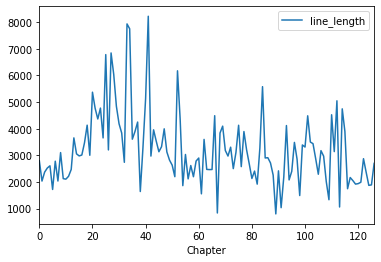

In [12]:


#Some Fun Analysis: Which is the longest capter???

#First, line length:
df['line_length'] = df['Line'].str.split().str.len()

df2 = df.groupby(['Chapter'])[['line_length']].sum()
df2.plot()

In [13]:
#Creating a wordcloud

#String with the entire text:
all_text = ' '.join(df['Line'].tolist())
#To lower all text
all_text = all_text.lower()

In [14]:
#Transforming the words into tokens
complains_token = nltk.word_tokenize(all_text)

#View the top 100 most frequenty words (without removing stopwords)
fdist1 = FreqDist(complains_token)
fdist1.most_common(10)

[(',', 35297),
 ('the', 20845),
 ('and', 16975),
 ('to', 13245),
 ('of', 12338),
 ('that', 7662),
 ('.', 7155),
 ('in', 6795),
 ('a', 6687),
 ('i', 6578)]

In [15]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
complains_token_sw = [w for w in complains_token if not w in stop_words]

fdist2 = FreqDist(complains_token_sw)


In [16]:
print(fdist2.most_common(30))

[(',', 35297), ('.', 7155), (';', 5919), ('``', 5133), ("''", 5047), ('said', 2610), ('quixote', 2133), ('sancho', 2125), ('one', 1570), ("'s", 1475), ('thou', 1210), ('would', 1207), ('?', 950), ('say', 889), ('good', 832), ('may', 800), ('see', 751), ('thee', 751), ('know', 703), ('without', 697), ('made', 654), ('!', 652), ('upon', 648), ('could', 644), ('us', 642), ('let', 641), ('come', 638), ('well', 624), ('time', 622), ('great', 620)]


In [17]:
new_stop = ['https' ,'http','www']
stop_words_2 = stop_words.union(new_stop)

complains_token_sw = [w for w in complains_token if not w in stop_words_2]

#Creating text object from new tokenization
complains_textnl = nltk.Text(complains_token_sw)

fdist3 = FreqDist(complains_token_sw)
fdist3.most_common(10)

[(',', 35297),
 ('.', 7155),
 (';', 5919),
 ('``', 5133),
 ("''", 5047),
 ('said', 2610),
 ('quixote', 2133),
 ('sancho', 2125),
 ('one', 1570),
 ("'s", 1475)]

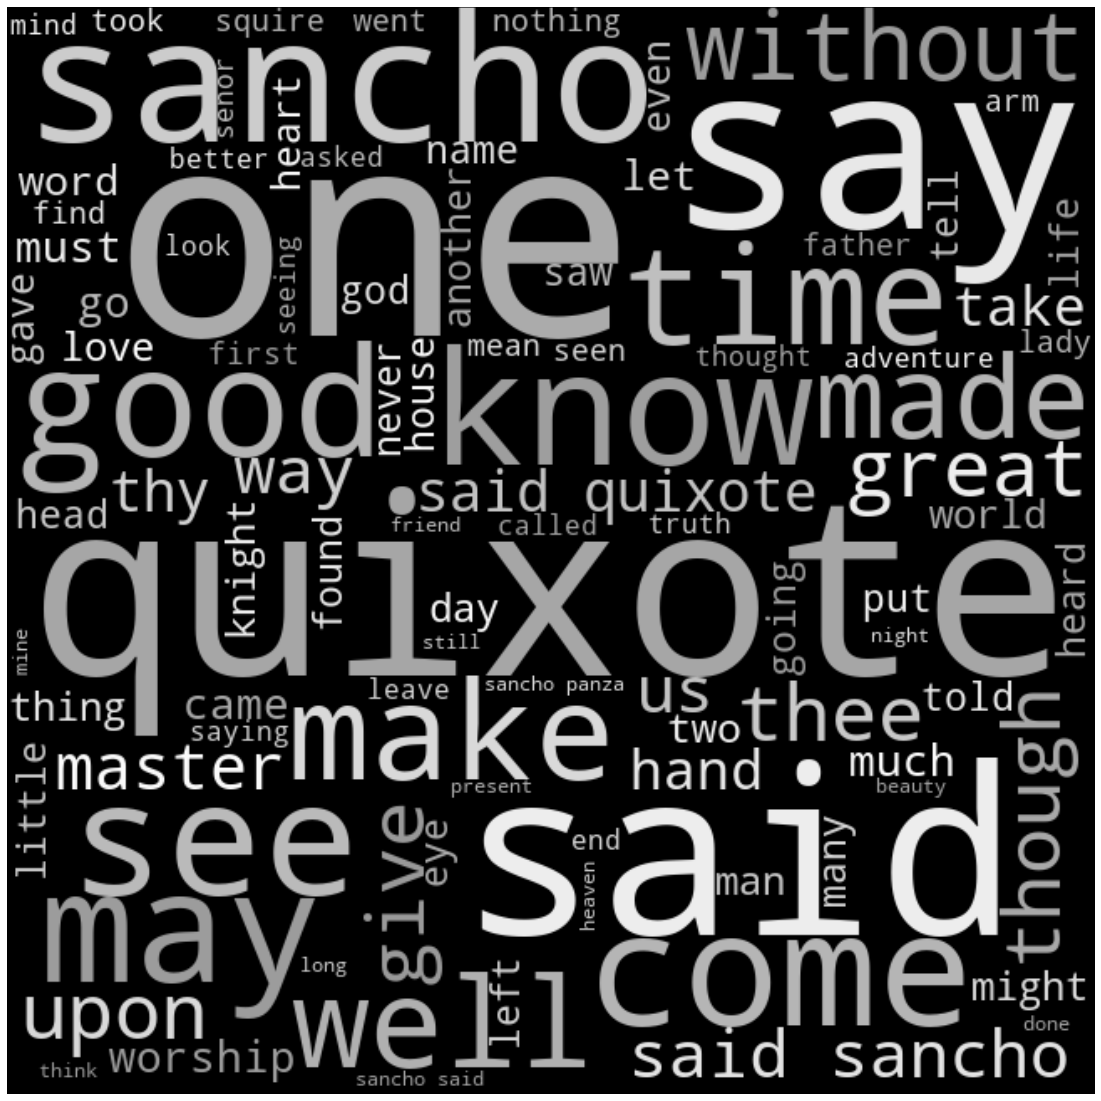

In [18]:
#creating a word cloud

#generating the text without stopwords into one string
text_wc = ' '.join(complains_token_sw)

#Generatig the wordcloud object
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black",width=1200, height=800).generate(text_wc)
#plotting the wordcloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#mask
from PIL import Image
import numpy as np


mex_mask = np.array(Image.open("quijotej2.jpg"))
#mex_mask = np.invert(mex_mask)



#Colors

mex_colors = np.array(Image.open("uijote2.png"))

#image_colors = ImageColorGenerator(mex_colors)

wordcloud = WordCloud(background_color="black", max_words=100, mask=mex_mask,
                contour_width=1, contour_color='white')


#wordcloud = WordCloud(background_color="white", max_words=100,
#                contour_width=1, contour_color='steelblue')
wordcloud.generate(text_wc)


#wordcloud.generate(text_wc)
#plt.figure()

#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

#wc.recolor(color_func=image_colors)


plt.figure(figsize=[20,20])
#plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

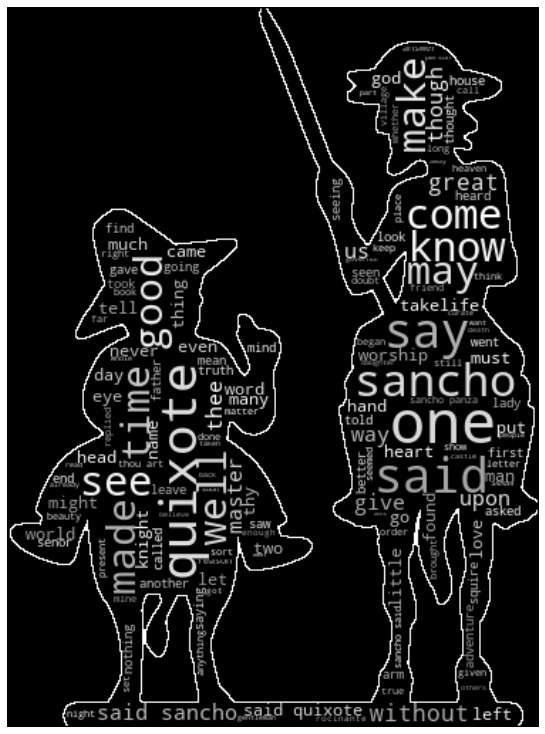

In [19]:
#creating a word cloud

#generating the text without stopwords into one string
text_wc = ' '.join(complains_token_sw)

#Generatig the wordcloud object
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black",width=1200, height=800).generate(text_wc)
#plotting the wordcloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#mask
from PIL import Image
import numpy as np


mex_mask = np.array(Image.open("uijote2.png"))
#mex_mask = np.invert(mex_mask)



#Colors

mex_colors = np.array(Image.open("uijote2.png"))

#image_colors = ImageColorGenerator(mex_colors)

wordcloud = WordCloud(background_color="black", max_words=150, mask=mex_mask,
                contour_width=1, contour_color='white',width=800, height=600)


#wordcloud = WordCloud(background_color="white", max_words=100,
#                contour_width=1, contour_color='steelblue')
wordcloud.generate(text_wc)


#wordcloud.generate(text_wc)
#plt.figure()

#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

#wc.recolor(color_func=image_colors)


plt.figure(figsize=[10,10])
#plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()